# Appendix



## Library requirements

Uncomment the first line to install library requirements.

In [2]:
# !pip3 install geopy pandas numpy matplotlib keras sklearn

import numpy
import matplotlib.pyplot as plt
import pandas
import math
from IPython.display import display
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import LSTM
from keras.layers import GRU
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# fix random seed for reproducibility
numpy.random.seed(7)

import geopy.distance

# The Haversine formula, which assumes the earth is a sphere,
# results in errors of up to about 0.5% (according to help(geopy.distance)).
# Vincenty distance uses more accurate ellipsoidal models such as WGS-84,
# and is implemented in geopy. 

# Test Geo
coords_1 = (52.2296756, 21.0122287)
coords_2 = (52.406374, 16.9251681)

if(geopy.distance.vincenty(coords_1, coords_2).km == 279.35290160386563):
    print("Geo Test passed.")

Geo Test passed.


## Raw dataset before pre-processing

#### Training Monitoring Sites
* Springwood
* Rocklea
* Clinton

#### Validation Monitoring Sites
* Brisbane CBD
* South Brisbane
* Woollongabba

In [3]:
# Training Set
# Springwood

#Date,
#Time,
#Wind Direction (degTN),
#Wind Speed (m/s),
#Wind Sigma Theta (deg),
#Air Temperature (degC),
#Ozone (ppm),
#Nitric Oxide (NO) (ppm),
#Nitrogen Dioxide (NO2) (ppm),
#Sulfur Dioxide (SO2) (ppm),
#PM10 (�g/m^3),
#PM2.5 (�g/m^3),
#Benzene (ppb),
#Toluene (ppb),
#Xylenes (total) (ppb),
#Formaldehyde (ppb)


spw2011 = '/home/anthonyrawlins/Documents/D3/Dataset/2011/springwood-aq-2011.csv'
spw2012 = '/home/anthonyrawlins/Documents/D3/Dataset/2012/springwood-aq-2012.csv'
spw2013 = '/home/anthonyrawlins/Documents/D3/Dataset/2013/springwood-aq-2013.csv'
spw2014 = '/home/anthonyrawlins/Documents/D3/Dataset/2014/springwood-aq-2014.csv'
spw2015 = '/home/anthonyrawlins/Documents/D3/Dataset/2015/springwood-aq-2015.csv'

df1_11 = pandas.read_csv(spw2011, usecols=[0,1,2,3,4,5,10], engine='python')
df1_12 = pandas.read_csv(spw2012, usecols=[0,1,2,3,4,5,10], engine='python')
df1_13 = pandas.read_csv(spw2013, usecols=[0,1,2,3,4,5,10], engine='python')
df1_14 = pandas.read_csv(spw2014, usecols=[0,1,2,3,4,5,10], engine='python')
df1_15 = pandas.read_csv(spw2015, usecols=[0,1,2,3,4,5,10], engine='python')

# Rocklea
rck2011 = '/home/anthonyrawlins/Documents/D3/Dataset/2011/rocklea-aq-2011.csv'
rck2012 = '/home/anthonyrawlins/Documents/D3/Dataset/2012/rocklea-aq-2012.csv'
rck2013 = '/home/anthonyrawlins/Documents/D3/Dataset/2013/rocklea-aq-2013.csv'
rck2014 = '/home/anthonyrawlins/Documents/D3/Dataset/2014/rocklea-aq-2014.csv'
rck2015 = '/home/anthonyrawlins/Documents/D3/Dataset/2015/rocklea-aq-2015.csv'

df2_11 = pandas.read_csv(rck2011, usecols=[0,1,2,3,4,5,6,14], engine='python')
df2_12 = pandas.read_csv(rck2012, usecols=[0,1,2,3,4,5,6,15], engine='python')
df2_13 = pandas.read_csv(rck2013, usecols=[0,1,2,3,4,5,6,15], engine='python')
df2_14 = pandas.read_csv(rck2014, usecols=[0,1,2,3,4,5,6,15], engine='python')
df2_15 = pandas.read_csv(rck2015, usecols=[0,1,2,3,4,5,6,15], engine='python')

# Clinton
ctn2011 = '/home/anthonyrawlins/Documents/D3/Dataset/2011/clinton-aq-2011.csv'
ctn2012 = '/home/anthonyrawlins/Documents/D3/Dataset/2012/clinton-aq-2012.csv'
ctn2013 = '/home/anthonyrawlins/Documents/D3/Dataset/2013/clinton-aq-2013.csv'
ctn2014 = '/home/anthonyrawlins/Documents/D3/Dataset/2014/clinton-aq-2014.csv'
ctn2015 = '/home/anthonyrawlins/Documents/D3/Dataset/2015/clinton-aq-2015.csv'

df3_11 = pandas.read_csv(ctn2011, usecols=[0,1,2,3,4,5,6,14], engine='python')
df3_12 = pandas.read_csv(ctn2012, usecols=[0,1,2,3,4,5,6,14], engine='python')
df3_13 = pandas.read_csv(ctn2013, usecols=[0,1,2,3,4,5,6,14], engine='python')
df3_14 = pandas.read_csv(ctn2014, usecols=[0,1,2,3,4,5,6,14], engine='python')
df3_15 = pandas.read_csv(ctn2015, usecols=[0,1,2,3,4,5,6,14], engine='python')

# Validation Set
# Brisbane CBD
cbd2011 = '/home/anthonyrawlins/Documents/D3/Dataset/2011/brisbanecbd-aq-2011.csv'
cbd2012 = '/home/anthonyrawlins/Documents/D3/Dataset/2012/brisbanecbd-aq-2012.csv'
cbd2013 = '/home/anthonyrawlins/Documents/D3/Dataset/2013/brisbanecbd-aq-2013.csv'
cbd2014 = '/home/anthonyrawlins/Documents/D3/Dataset/2014/brisbanecbd-aq-2014.csv'
cbd2015 = '/home/anthonyrawlins/Documents/D3/Dataset/2015/brisbanecbd-aq-2015.csv'

df4_11 = pandas.read_csv(cbd2011, usecols=[0,1,2,3,4,5,6,7], engine='python')
df4_12 = pandas.read_csv(cbd2012, usecols=[0,1,2,3,4,5,6,7], engine='python')
df4_13 = pandas.read_csv(cbd2013, usecols=[0,1,2,3,4,5,6,7], engine='python')
df4_14 = pandas.read_csv(cbd2014, usecols=[0,1,2,3,4,5,6,7], engine='python')
df4_15 = pandas.read_csv(cbd2015, usecols=[0,1,2,3,4,5,6,7], engine='python')

# South Brisbane
sb2011 = '/home/anthonyrawlins/Documents/D3/Dataset/2011/southbrisbane-aq-2011.csv'
sb2012 = '/home/anthonyrawlins/Documents/D3/Dataset/2012/southbrisbane-aq-2012.csv'
sb2013 = '/home/anthonyrawlins/Documents/D3/Dataset/2013/southbrisbane-aq-2013.csv'
sb2014 = '/home/anthonyrawlins/Documents/D3/Dataset/2014/southbrisbane-aq-2014.csv'
sb2015 = '/home/anthonyrawlins/Documents/D3/Dataset/2015/southbrisbane-aq-2015.csv'

df5_11 = pandas.read_csv(sb2011, usecols=[0,1,2,3,4,5,6,12], engine='python')
df5_12 = pandas.read_csv(sb2012, usecols=[0,1,2,3,4,5,6,12], engine='python')
df5_13 = pandas.read_csv(sb2013, usecols=[0,1,2,3,4,5,6,12], engine='python')
df5_14 = pandas.read_csv(sb2014, usecols=[0,1,2,3,4,5,6,12], engine='python')
df5_15 = pandas.read_csv(sb2015, usecols=[0,1,2,3,4,5,6,12], engine='python')

# Woollongabba
wg2011 = '/home/anthonyrawlins/Documents/D3/Dataset/2011/woolloongabba-aq-2011.csv'
wg2012 = '/home/anthonyrawlins/Documents/D3/Dataset/2012/woolloongabba-aq-2012.csv'
wg2013 = '/home/anthonyrawlins/Documents/D3/Dataset/2013/woolloongabba-aq-2013.csv'
wg2014 = '/home/anthonyrawlins/Documents/D3/Dataset/2014/woolloongabba-aq-2014.csv'
wg2015 = '/home/anthonyrawlins/Documents/D3/Dataset/2015/woolloongabba-aq-2015.csv'

df6_11 = pandas.read_csv(wg2011, usecols=[0,1,2,3,4,5,6,12], engine='python')
df6_12 = pandas.read_csv(wg2012, usecols=[0,1,2,3,4,5,6,12], engine='python')
df6_13 = pandas.read_csv(wg2013, usecols=[0,1,2,3,4,5,6,12], engine='python')
df6_14 = pandas.read_csv(wg2014, usecols=[0,1,2,3,4,5,6,12], engine='python')
df6_15 = pandas.read_csv(wg2015, usecols=[0,1,2,3,4,5,6,12], engine='python')

#search and replace column names
search_and_replace = {'Wind Direction  (degTN)':'Wind Direction (degTN)','PM10 (�g/m^3)':'PM10 (ug/m^3)', 'PM2.5 (�g/m^3)':'PM2.5 (ug/m^3)', 'Date ':'Date', 'Time ':'Time'}

df1_11.rename(columns=search_and_replace, inplace=True)
df1_12.rename(columns=search_and_replace, inplace=True)
df1_13.rename(columns=search_and_replace, inplace=True)
df1_14.rename(columns=search_and_replace, inplace=True)
df1_15.rename(columns=search_and_replace, inplace=True)

df2_11.rename(columns=search_and_replace, inplace=True)
df2_12.rename(columns=search_and_replace, inplace=True)
df2_13.rename(columns=search_and_replace, inplace=True)
df2_14.rename(columns=search_and_replace, inplace=True)
df2_15.rename(columns=search_and_replace, inplace=True)

df3_11.rename(columns=search_and_replace, inplace=True)
df3_12.rename(columns=search_and_replace, inplace=True)
df3_13.rename(columns=search_and_replace, inplace=True)
df3_14.rename(columns=search_and_replace, inplace=True)
df3_15.rename(columns=search_and_replace, inplace=True)

df4_11.rename(columns=search_and_replace, inplace=True)
df4_12.rename(columns=search_and_replace, inplace=True)
df4_13.rename(columns=search_and_replace, inplace=True)
df4_14.rename(columns=search_and_replace, inplace=True)
df4_15.rename(columns=search_and_replace, inplace=True)

df5_11.rename(columns=search_and_replace, inplace=True)
df5_12.rename(columns=search_and_replace, inplace=True)
df5_13.rename(columns=search_and_replace, inplace=True)
df5_14.rename(columns=search_and_replace, inplace=True)
df5_15.rename(columns=search_and_replace, inplace=True)

df6_11.rename(columns=search_and_replace, inplace=True)
df6_12.rename(columns=search_and_replace, inplace=True)
df6_13.rename(columns=search_and_replace, inplace=True)
df6_14.rename(columns=search_and_replace, inplace=True)
df6_15.rename(columns=search_and_replace, inplace=True)

frames_a = [df1_11, df1_12, df1_13, df1_14, df1_15]
frames_b = [df2_11, df2_12, df2_13, df2_14, df2_15]
frames_c = [df3_11, df3_12, df3_13, df3_14, df3_15]
frames_d = [df4_11, df4_12, df4_13, df4_14, df4_15]
frames_e = [df5_11, df5_12, df5_13, df5_14, df5_15]
frames_f = [df6_11, df6_12, df6_13, df6_14, df6_15]

dataframe_a = pandas.concat(frames_a,ignore_index=True)
dataframe_b = pandas.concat(frames_b,ignore_index=True)
dataframe_c = pandas.concat(frames_c,ignore_index=True)

dataframe_d = pandas.concat(frames_d,ignore_index=True)
dataframe_e = pandas.concat(frames_e,ignore_index=True)
dataframe_f = pandas.concat(frames_f,ignore_index=True)


#Pad the dust and temperature values - limit to 3 hours?
cols_to_pad = ['Air Temperature (degC)', 'PM10 (ug/m^3)']
dataframe_a[cols_to_pad] = dataframe_a[cols_to_pad].fillna(method='pad',limit=3)
dataframe_b[cols_to_pad] = dataframe_b[cols_to_pad].fillna(method='pad',limit=3)
dataframe_c[cols_to_pad] = dataframe_c[cols_to_pad].fillna(method='pad',limit=3)
dataframe_d[cols_to_pad] = dataframe_d[cols_to_pad].fillna(method='pad',limit=3)
dataframe_e[cols_to_pad] = dataframe_e[cols_to_pad].fillna(method='pad',limit=3)
dataframe_f[cols_to_pad] = dataframe_f[cols_to_pad].fillna(method='pad',limit=3)

# Add a column for missing data - justify the std dev??
dataframe_a['Wind Speed Std Dev (m/s)'] = 0.3

dataset_a = dataframe_a.fillna(0)
dataset_b = dataframe_b.fillna(0)
dataset_c = dataframe_c.fillna(0)
dataset_d = dataframe_d.fillna(0)
dataset_e = dataframe_e.fillna(0)
dataset_f = dataframe_f.fillna(0)

dataset_a = dataset_a.reindex_axis(sorted(dataset_a.columns), axis=1)
dataset_b = dataset_b.reindex_axis(sorted(dataset_b.columns), axis=1)
dataset_c = dataset_c.reindex_axis(sorted(dataset_c.columns), axis=1)
dataset_d = dataset_d.reindex_axis(sorted(dataset_d.columns), axis=1)
dataset_e = dataset_e.reindex_axis(sorted(dataset_e.columns), axis=1)
dataset_f = dataset_f.reindex_axis(sorted(dataset_f.columns), axis=1)

print("Springwood")
print(dataset_a.shape)
display(dataset_a)

print("Rocklea")
print(dataset_b.shape)
display(dataset_b)

print("Clinton")
print(dataset_c.shape)
display(dataset_c)

print("Brisbane")
print(dataset_d.shape)
display(dataset_d)

print("South Brisbane")
print(dataset_e.shape)
display(dataset_e)

print("Woollongabba")
print(dataset_f.shape)
display(dataset_f)

Springwood
(43824, 8)


,Air Temperature (degC),Date,PM10 (ug/m^3),Time,Wind Direction (degTN),Wind Sigma Theta (deg),Wind Speed (m/s),Wind Speed Std Dev (m/s)
0,21.7,01/01/2011,17.0,00:00,204.0,7.1,1.3,0.3
1,21.8,01/01/2011,16.7,01:00,213.0,52.9,0.7,0.3
2,22.0,01/01/2011,17.2,02:00,175.0,15.2,1.5,0.3
3,22.7,01/01/2011,14.2,03:00,152.0,10.8,2.3,0.3
4,21.9,01/01/2011,16.4,04:00,155.0,14.0,2.1,0.3
5,22.0,01/01/2011,13.5,05:00,160.0,9.5,2.3,0.3
6,22.1,01/01/2011,15.4,06:00,176.0,7.8,2.3,0.3
7,22.7,01/01/2011,12.0,07:00,175.0,5.6,2.6,0.3
8,23.1,01/01/2011,10.2,08:00,177.0,9.6,2.7,0.3
9,23.9,01/01/2011,8.7,09:00,146.0,15.2,2.6,0.3


Rocklea
(43824, 8)


,Air Temperature (degC),Date,PM10 (ug/m^3),Time,Wind Direction (degTN),Wind Sigma Theta (deg),Wind Speed (m/s),Wind Speed Std Dev (m/s)
0,20.6,01/01/2011,17.4,00:00,199.0,10.9,2.1,0.4
1,20.9,01/01/2011,13.3,01:00,186.0,18.0,1.5,0.6
2,20.9,01/01/2011,14.5,02:00,190.0,14.4,1.5,0.5
3,21.2,01/01/2011,17.0,03:00,190.0,10.4,2.1,0.7
4,21.1,01/01/2011,17.8,04:00,195.0,8.5,2.5,0.5
5,21.4,01/01/2011,14.8,05:00,192.0,9.8,2.5,0.6
6,21.6,01/01/2011,14.5,06:00,182.0,15.1,3.0,0.8
7,21.8,01/01/2011,11.2,07:00,172.0,16.2,3.6,0.9
8,22.6,01/01/2011,12.5,08:00,161.0,15.8,3.7,1.0
9,23.6,01/01/2011,11.1,09:00,140.0,16.6,4.1,0.9


Clinton
(43824, 8)


,Air Temperature (degC),Date,PM10 (ug/m^3),Time,Wind Direction (degTN),Wind Sigma Theta (deg),Wind Speed (m/s),Wind Speed Std Dev (m/s)
0,22.8,01/01/2011,18.3,00:00,156.0,14.4,2.1,0.7
1,22.5,01/01/2011,20.6,01:00,174.0,16.8,2.2,0.7
2,21.9,01/01/2011,15.0,02:00,183.0,12.2,2.3,0.8
3,22.1,01/01/2011,11.7,03:00,187.0,12.0,1.9,0.5
4,22.2,01/01/2011,10.9,04:00,190.0,12.9,1.9,0.6
5,22.4,01/01/2011,12.0,05:00,183.0,15.9,1.7,0.6
6,23.4,01/01/2011,10.8,06:00,189.0,18.1,1.7,0.7
7,24.7,01/01/2011,7.5,07:00,196.0,19.0,2.4,1.0
8,25.6,01/01/2011,7.1,08:00,205.0,18.4,2.8,1.0
9,26.6,01/01/2011,4.6,09:00,178.0,23.3,2.6,1.0


Brisbane
(43824, 8)


,Air Temperature (degC),Date,PM10 (ug/m^3),Time,Wind Direction (degTN),Wind Sigma Theta (deg),Wind Speed (m/s),Wind Speed Std Dev (m/s)
0,0.0,01/01/2011,15.1,00:00,163.0,135.7,0.3,0.6
1,0.0,01/01/2011,12.9,01:00,139.0,107.1,0.2,0.5
2,0.0,01/01/2011,14.7,02:00,116.0,118.7,0.1,0.5
3,0.0,01/01/2011,14.7,03:00,162.0,108.8,0.2,0.6
4,0.0,01/01/2011,14.5,04:00,175.0,90.8,0.4,0.6
5,0.0,01/01/2011,14.0,05:00,177.0,78.6,0.6,0.7
6,0.0,01/01/2011,16.9,06:00,179.0,76.5,0.9,1.0
7,0.0,01/01/2011,13.7,07:00,181.0,102.4,0.5,0.7
8,0.0,01/01/2011,10.2,08:00,171.0,42.8,1.5,1.0
9,0.0,01/01/2011,7.8,09:00,142.0,50.7,1.6,1.0


South Brisbane
(43824, 8)


,Air Temperature (degC),Date,PM10 (ug/m^3),Time,Wind Direction (degTN),Wind Sigma Theta (deg),Wind Speed (m/s),Wind Speed Std Dev (m/s)
0,22.0,01/01/2011,12.2,00:00,156.0,20.9,1.6,0.5
1,22.1,01/01/2011,14.8,01:00,157.0,17.6,1.6,0.5
2,21.9,01/01/2011,13.1,02:00,161.0,18.5,1.7,0.6
3,21.8,01/01/2011,12.4,03:00,162.0,18.6,1.9,0.7
4,22.0,01/01/2011,11.5,04:00,158.0,18.3,1.7,0.6
5,22.0,01/01/2011,12.6,05:00,158.0,21.3,2.0,0.8
6,22.1,01/01/2011,9.0,06:00,155.0,20.1,2.0,0.8
7,21.8,01/01/2011,6.0,07:00,157.0,19.7,2.1,0.7
8,22.5,01/01/2011,4.3,08:00,155.0,15.5,2.5,1.1
9,22.9,01/01/2011,1.7,09:00,141.0,18.0,2.6,1.2


Woollongabba
(43824, 8)


,Air Temperature (degC),Date,PM10 (ug/m^3),Time,Wind Direction (degTN),Wind Sigma Theta (deg),Wind Speed (m/s),Wind Speed Std Dev (m/s)
0,22.6,01/01/2011,18.4,00:00,223.0,36.9,0.9,0.6
1,22.3,01/01/2011,14.5,01:00,217.0,41.5,0.7,0.5
2,22.1,01/01/2011,16.5,02:00,220.0,39.0,0.7,0.5
3,22.1,01/01/2011,14.3,03:00,225.0,36.9,0.8,0.5
4,22.3,01/01/2011,16.0,04:00,206.0,28.1,1.3,0.7
5,22.2,01/01/2011,12.1,05:00,200.0,27.5,1.1,0.6
6,22.2,01/01/2011,12.4,06:00,192.0,25.7,1.8,0.8
7,22.0,01/01/2011,6.7,07:00,195.0,23.1,2.1,0.9
8,22.8,01/01/2011,6.3,08:00,177.0,25.5,2.0,0.9
9,23.2,01/01/2011,5.3,09:00,159.0,22.9,2.3,1.1


### Data Transformation Functions

#### Merging date and time to seconds since Jan 1st 1970

In [4]:
from datetime import datetime

start_of_set = datetime.strptime('01/01/2011 00:00', '%d/%m/%Y %H:%M')
print(start_of_set)
epoch = datetime.utcfromtimestamp(0)

def unix_time_hours(dt):
    return (dt - start_of_set).total_seconds()/(60*60)

def streamline_time(df):
    df['Datetime'] = (pandas.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M')).map(unix_time_hours)
    df = df.drop(['Date', 'Time'], axis=1)
    return df
dataset__a = streamline_time(dataset_a)
dataset__b = streamline_time(dataset_b)
dataset__c = streamline_time(dataset_c)
dataset__d = streamline_time(dataset_d)
dataset__e = streamline_time(dataset_e)
dataset__f = streamline_time(dataset_f)


2011-01-01 00:00:00


#### Convert Direction to  Sine/Cosine pair

Manipulate the columns that contain degrees from True North to be sine/cosine pairs and append those new columns to the dataset. This is done for both wind direction and wind variability factors. The function is mapped as a lambda.

In [5]:
sine = lambda x: math.sin(x)
cosine = lambda x: math.cos(x)

def split_angle(df):
    df['Wind Sigma sine'] = pandas.DataFrame(df['Wind Sigma Theta (deg)'].map(sine))
    df['Wind Sigma cosine'] = pandas.DataFrame(df['Wind Sigma Theta (deg)'].map(cosine))
    df['Wind TN sine'] = pandas.DataFrame(df['Wind Direction (degTN)'].map(sine))
    df['Wind TN cosine'] = pandas.DataFrame(df['Wind Direction (degTN)'].map(cosine))
    df = df.drop(['Wind Sigma Theta (deg)', 'Wind Direction (degTN)'], axis=1)
    df.fillna(0)
    return df

_a = split_angle(dataset__a)
_b = split_angle(dataset__b)
_c = split_angle(dataset__c)
_d = split_angle(dataset__d)
_e = split_angle(dataset__e)
_f = split_angle(dataset__f)

dataset = _c
print(dataset.shape)
display(dataset)


(43824, 9)


,Air Temperature (degC),PM10 (ug/m^3),Wind Speed (m/s),Wind Speed Std Dev (m/s),Datetime,Wind Sigma sine,Wind Sigma cosine,Wind TN sine,Wind TN cosine
0,22.8,18.3,2.1,0.7,0.0,0.965658,-0.259817,-0.881785,0.471652
1,22.5,20.6,2.2,0.7,1.0,-0.887567,-0.460679,-0.936462,-0.350769
2,21.9,15.0,2.3,0.8,2.0,-0.358229,0.933634,0.708680,0.705530
3,22.1,11.7,1.9,0.5,3.0,-0.536573,0.843854,-0.997171,0.075166
4,22.2,10.9,1.9,0.6,4.0,0.327474,0.944860,0.997799,0.066307
5,22.4,12.0,1.7,0.6,5.0,-0.190859,-0.981618,0.708680,0.705530
6,23.4,10.8,1.7,0.7,6.0,-0.681314,0.731991,0.483318,0.875445
7,24.7,7.5,2.4,1.0,7.0,0.149877,0.988705,0.939530,0.342466
8,25.6,7.1,2.8,1.0,8.0,-0.434566,0.900640,-0.714898,-0.699229
9,26.6,4.6,2.6,1.0,9.0,-0.965888,-0.258960,0.877575,-0.479439


## Pre-processed dataset

In [6]:
#dataset.to_csv('saved.csv')

## Reshape the input data

Input and expected output are created from the dataset as two frames of floating point numbers

## Normalisation

Scale the inputs between zero and one.

(Supervisors... NB I'm having some trouble with the inverse_transformation of my MinMaxScaler and numpy dimensions, see below...)

In [7]:
# 10% of the dataset to speed things up!
#dataset = dataset[:int(len(dataset)/10)]


# Quick hack to ignore timestamps
dataset = dataset.drop(['Datetime'], axis=1)

# split into train and test sets
train_size = int(len(dataset) * 0.5)
test_size = len(dataset) - train_size

train, test = dataset[0:train_size], dataset[train_size:len(dataset)]
print(train.shape)
print(test.shape)

#for a in range(0,train.shape[1]-1):

x_scaler = MinMaxScaler(feature_range=(0, 1))
y_scaler = MinMaxScaler(feature_range=(0, 1))


#cols_to_norm = ['Air Temperature (degC)', 'PM10 (ug/m^3)']
train = x_scaler.fit_transform(train)
test = y_scaler.fit_transform(test)



#display(pandas.DataFrame(train))
#display(pandas.DataFrame(test))

(21912, 8)
(21912, 8)


In [8]:
train = numpy.array(train)
test = numpy.array(test)

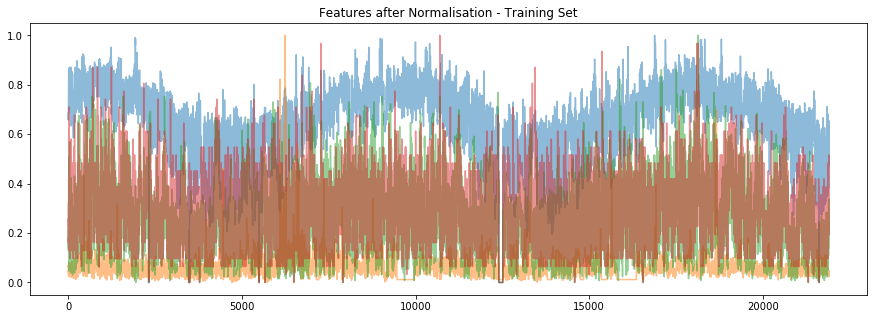

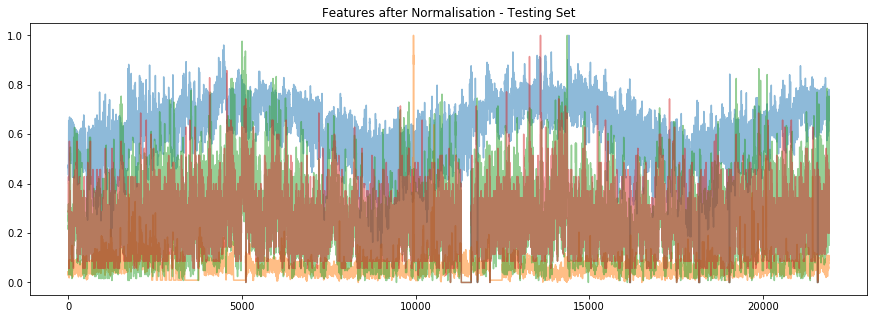

In [9]:
plt.figure(figsize=(15,5))
plt.title('Features after Normalisation - Training Set')
plt.plot(train[:,0:4], '-', alpha=0.5)
plt.show()

plt.figure(figsize=(15,5))
plt.title('Features after Normalisation - Testing Set')
plt.plot(test[:,0:4], '-', alpha=0.5)
plt.show()

In [10]:
# reshape into X=t and Y=t+1
look_back = 7
outputs = 1

# convert an array of values into a dataset matrix
def create_dataset(d, look_back=1):
    dataX, dataY = [], []
    #window = dataset.shape[1]*look_back
        
    for i in range((d.shape[0]-1)-look_back): 
        
        #current time slice for 3 locations is the input data for time i
        a = d[i:(i+look_back)]
        dataX.extend([a])
        
        # 2nd record from the 3rd dimension of the i+1th time sample is the answer to the ith prediction
        b = d[i+look_back+1,1:2]
        dataY.extend([b])
        
    return numpy.array(dataX), numpy.array(dataY)

trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

print(trainX.shape)
display(trainX[0:10])
print(trainY.shape)
display(trainY)

(21904, 7, 8)


array([[[  6.84684685e-01,   6.35460993e-02,   1.61538462e-01,
           2.25806452e-01,   9.82830529e-01,   3.70088258e-01,
           5.91057388e-02,   7.35826147e-01],
        [  6.75675676e-01,   7.00709220e-02,   1.69230769e-01,
           2.25806452e-01,   5.62119604e-02,   2.69657154e-01,
           3.17657296e-02,   3.24615443e-01],
        [  6.57657658e-01,   5.41843972e-02,   1.76923077e-01,
           2.58064516e-01,   3.20882597e-01,   9.66816661e-01,
           8.54376982e-01,   8.52764822e-01],
        [  6.63663664e-01,   4.48226950e-02,   1.46153846e-01,
           1.61290323e-01,   2.31710186e-01,   9.21926600e-01,
           1.40972671e-03,   5.37583075e-01],
        [  6.66666667e-01,   4.25531915e-02,   1.46153846e-01,
           1.93548387e-01,   6.63736738e-01,   9.72429885e-01,
           9.98943458e-01,   5.33153429e-01],
        [  6.72672673e-01,   4.56737589e-02,   1.30769231e-01,
           1.93548387e-01,   4.04568504e-01,   9.18640945e-03,
           8.5

(21904, 1)


array([[ 0.03177305],
       [ 0.02468085],
       [ 0.02524823],
       ..., 
       [ 0.03489362],
       [ 0.0329078 ],
       [ 0.02723404]])

# Defining and Training the model

In [34]:
# Batch Size
batches = 32

num_cols=8

# epochs
E = 200

# create and fit the RNNs
model = Sequential()

model.add(GRU(num_cols^2, input_shape=(look_back, num_cols), return_sequences=True))
model.add(GRU(num_cols^2, return_sequences=True, activation='tanh'))
model.add(GRU(num_cols^2, input_shape=(look_back, num_cols^2)))
model.add(Dense(num_cols^2))
model.add(Dense(outputs))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

config_1 = model.get_config()

history = model.fit(trainX, trainY, epochs=E, batch_size=batches, verbose=1, validation_data=(testX,testY), shuffle=False)

model.summary()



trainPredict = (model.predict(trainX))
testPredict = model.predict(testX)

Train on 21904 samples, validate on 21904 samples
Epoch 1/200
21904/21904 [==============================] - 11s - loss: 0.0018 - acc: 4.5654e-05 - mean_absolute_error: 0.0262 - val_loss: 0.0012 - val_acc: 9.1308e-05 - val_mean_absolute_error: 0.0225
Epoch 2/200
21904/21904 [==============================] - 8s - loss: 0.0015 - acc: 4.5654e-05 - mean_absolute_error: 0.0236 - val_loss: 0.0012 - val_acc: 9.1308e-05 - val_mean_absolute_error: 0.0222
Epoch 3/200
21904/21904 [==============================] - 8s - loss: 0.0015 - acc: 4.5654e-05 - mean_absolute_error: 0.0231 - val_loss: 0.0012 - val_acc: 9.1308e-05 - val_mean_absolute_error: 0.0220
Epoch 4/200
21904/21904 [==============================] - 8s - loss: 0.0014 - acc: 4.5654e-05 - mean_absolute_error: 0.0227 - val_loss: 0.0011 - val_acc: 9.1308e-05 - val_mean_absolute_error: 0.0217
Epoch 5/200
21904/21904 [==============================] - 8s - loss: 0.0014 - acc: 4.5654e-05 - mean_absolute_error: 0.0222 - val_loss: 0.0011 - val

KeyboardInterrupt: 

## Alternative Model - Deep LSTM

In [28]:
# Batch Size
batches = 32

model2 = Sequential()

model2.add(LSTM(num_cols^2, batch_input_shape=(batches, look_back, num_cols), return_sequences=True, stateful=True))
model2.add(LSTM(num_cols^2, input_shape=(look_back, num_cols), return_sequences=True, stateful=True))
model2.add(LSTM(num_cols, return_sequences=True, stateful=True))
model2.add(LSTM(num_cols, return_sequences=True, stateful=True))
model2.add(LSTM(num_cols, return_sequences=True, stateful=True))
model2.add(LSTM(num_cols, return_sequences=True, stateful=True))
model2.add(LSTM(num_cols, return_sequences=True, stateful=True))
model2.add(LSTM(num_cols, return_sequences=True, stateful=True))
model2.add(LSTM(num_cols, return_sequences=True, stateful=True))
model2.add(LSTM(num_cols, return_sequences=True, stateful=True))
model2.add(LSTM(num_cols, return_sequences=True, stateful=True))
model2.add(LSTM(num_cols, return_sequences=True, stateful=True))
model2.add(LSTM(num_cols, return_sequences=True, stateful=True))
model2.add(LSTM(num_cols, return_sequences=True, stateful=True))
model2.add(LSTM(num_cols, return_sequences=True, stateful=True))
model2.add(LSTM(outputs, stateful=True))
model2.add(Dense(outputs))
#model2.add(Dense(num_cols))

model2.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
config_2 = model2.get_config()
history2 = model2.fit(trainX, trainY, epochs=E, batch_size=batches, verbose=1, validation_data=(testX,testY), shuffle=False)

model2.summary()

trainPredict2 = model2.predict(trainX, batch_size=batches)
testPredict2 = model2.predict(testX, batch_size=batches)

Train on 21904 samples, validate on 21904 samples
Epoch 1/200
21904/21904 [==============================] - 11s - loss: 0.0025 - acc: 4.5654e-05 - mean_absolute_error: 0.0344 - val_loss: 0.0014 - val_acc: 9.1308e-05 - val_mean_absolute_error: 0.0277
Epoch 2/200
21904/21904 [==============================] - 2s - loss: 0.0016 - acc: 4.5654e-05 - mean_absolute_error: 0.0239 - val_loss: 0.0013 - val_acc: 9.1308e-05 - val_mean_absolute_error: 0.0232
Epoch 3/200
21904/21904 [==============================] - 2s - loss: 0.0016 - acc: 4.5654e-05 - mean_absolute_error: 0.0227 - val_loss: 0.0012 - val_acc: 9.1308e-05 - val_mean_absolute_error: 0.0230
Epoch 4/200
21904/21904 [==============================] - 2s - loss: 0.0015 - acc: 4.5654e-05 - mean_absolute_error: 0.0228 - val_loss: 0.0012 - val_acc: 9.1308e-05 - val_mean_absolute_error: 0.0227
Epoch 5/200
21904/21904 [==============================] - 2s - loss: 0.0015 - acc: 4.5654e-05 - mean_absolute_error: 0.0226 - val_loss: 0.0012 - val

21904/21904 [==============================] - 2s - loss: 0.0015 - acc: 4.5654e-05 - mean_absolute_error: 0.0227 - val_loss: 0.0012 - val_acc: 9.1308e-05 - val_mean_absolute_error: 0.0228
Epoch 42/200
21904/21904 [==============================] - 2s - loss: 0.0015 - acc: 4.5654e-05 - mean_absolute_error: 0.0227 - val_loss: 0.0012 - val_acc: 9.1308e-05 - val_mean_absolute_error: 0.0228
Epoch 43/200
21904/21904 [==============================] - 2s - loss: 0.0015 - acc: 4.5654e-05 - mean_absolute_error: 0.0227 - val_loss: 0.0012 - val_acc: 9.1308e-05 - val_mean_absolute_error: 0.0228
Epoch 44/200
21904/21904 [==============================] - 2s - loss: 0.0015 - acc: 4.5654e-05 - mean_absolute_error: 0.0227 - val_loss: 0.0012 - val_acc: 9.1308e-05 - val_mean_absolute_error: 0.0228
Epoch 45/200
21904/21904 [==============================] - 2s - loss: 0.0015 - acc: 4.5654e-05 - mean_absolute_error: 0.0227 - val_loss: 0.0012 - val_acc: 9.1308e-05 - val_mean_absolute_error: 0.0228
Epoch 46

21904/21904 [==============================] - 2s - loss: 0.0015 - acc: 4.5654e-05 - mean_absolute_error: 0.0227 - val_loss: 0.0012 - val_acc: 9.1308e-05 - val_mean_absolute_error: 0.0228
Epoch 82/200
21904/21904 [==============================] - 2s - loss: 0.0015 - acc: 4.5654e-05 - mean_absolute_error: 0.0227 - val_loss: 0.0012 - val_acc: 9.1308e-05 - val_mean_absolute_error: 0.0228
Epoch 83/200
21904/21904 [==============================] - 2s - loss: 0.0015 - acc: 4.5654e-05 - mean_absolute_error: 0.0227 - val_loss: 0.0012 - val_acc: 9.1308e-05 - val_mean_absolute_error: 0.0228
Epoch 84/200
21904/21904 [==============================] - 2s - loss: 0.0015 - acc: 4.5654e-05 - mean_absolute_error: 0.0227 - val_loss: 0.0012 - val_acc: 9.1308e-05 - val_mean_absolute_error: 0.0228
Epoch 85/200
21904/21904 [==============================] - 2s - loss: 0.0015 - acc: 4.5654e-05 - mean_absolute_error: 0.0227 - val_loss: 0.0012 - val_acc: 9.1308e-05 - val_mean_absolute_error: 0.0228
Epoch 86

21904/21904 [==============================] - 2s - loss: 0.0015 - acc: 4.5654e-05 - mean_absolute_error: 0.0227 - val_loss: 0.0012 - val_acc: 9.1308e-05 - val_mean_absolute_error: 0.0228
Epoch 122/200
21904/21904 [==============================] - 2s - loss: 0.0015 - acc: 4.5654e-05 - mean_absolute_error: 0.0227 - val_loss: 0.0012 - val_acc: 9.1308e-05 - val_mean_absolute_error: 0.0228
Epoch 123/200
21904/21904 [==============================] - 2s - loss: 0.0015 - acc: 4.5654e-05 - mean_absolute_error: 0.0227 - val_loss: 0.0012 - val_acc: 9.1308e-05 - val_mean_absolute_error: 0.0228
Epoch 124/200
21904/21904 [==============================] - 2s - loss: 0.0015 - acc: 4.5654e-05 - mean_absolute_error: 0.0227 - val_loss: 0.0012 - val_acc: 9.1308e-05 - val_mean_absolute_error: 0.0228
Epoch 125/200
21904/21904 [==============================] - 2s - loss: 0.0015 - acc: 4.5654e-05 - mean_absolute_error: 0.0226 - val_loss: 0.0012 - val_acc: 9.1308e-05 - val_mean_absolute_error: 0.0228
Epoc

21904/21904 [==============================] - 2s - loss: 0.0015 - acc: 4.5654e-05 - mean_absolute_error: 0.0226 - val_loss: 0.0012 - val_acc: 9.1308e-05 - val_mean_absolute_error: 0.0228
Epoch 162/200
21904/21904 [==============================] - 2s - loss: 0.0015 - acc: 4.5654e-05 - mean_absolute_error: 0.0226 - val_loss: 0.0012 - val_acc: 9.1308e-05 - val_mean_absolute_error: 0.0228
Epoch 163/200
21904/21904 [==============================] - 2s - loss: 0.0015 - acc: 4.5654e-05 - mean_absolute_error: 0.0226 - val_loss: 0.0012 - val_acc: 9.1308e-05 - val_mean_absolute_error: 0.0228
Epoch 164/200
21904/21904 [==============================] - 2s - loss: 0.0015 - acc: 4.5654e-05 - mean_absolute_error: 0.0226 - val_loss: 0.0012 - val_acc: 9.1308e-05 - val_mean_absolute_error: 0.0228
Epoch 165/200
21904/21904 [==============================] - 2s - loss: 0.0015 - acc: 4.5654e-05 - mean_absolute_error: 0.0226 - val_loss: 0.0012 - val_acc: 9.1308e-05 - val_mean_absolute_error: 0.0228
Epoc

In [30]:
# Batch Size
batches = 32

simple_model = Sequential()
simple_model.add(GRU(outputs, input_shape=(look_back, num_cols)))
simple_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])


history3 = simple_model.fit(trainX, trainY, epochs=E, batch_size=batches, verbose=1, validation_data=(testX,testY))
simple_model.summary()
config_3 = simple_model.get_config()

trainPredict3 = simple_model.predict(trainX, batch_size=batches)
testPredict3 = simple_model.predict(testX, batch_size=batches)

Train on 21904 samples, validate on 21904 samples
Epoch 1/200
21904/21904 [==============================] - 1s - loss: 0.0136 - acc: 4.5654e-05 - mean_absolute_error: 0.0914 - val_loss: 0.0107 - val_acc: 9.1308e-05 - val_mean_absolute_error: 0.0814
Epoch 2/200
21904/21904 [==============================] - 0s - loss: 0.0109 - acc: 4.5654e-05 - mean_absolute_error: 0.0793 - val_loss: 0.0093 - val_acc: 9.1308e-05 - val_mean_absolute_error: 0.0752
Epoch 3/200
21904/21904 [==============================] - 0s - loss: 0.0096 - acc: 4.5654e-05 - mean_absolute_error: 0.0739 - val_loss: 0.0081 - val_acc: 9.1308e-05 - val_mean_absolute_error: 0.0697
Epoch 4/200
21904/21904 [==============================] - 0s - loss: 0.0084 - acc: 4.5654e-05 - mean_absolute_error: 0.0686 - val_loss: 0.0072 - val_acc: 9.1308e-05 - val_mean_absolute_error: 0.0653
Epoch 5/200
21904/21904 [==============================] - 0s - loss: 0.0075 - acc: 4.5654e-05 - mean_absolute_error: 0.0639 - val_loss: 0.0064 - val_

21904/21904 [==============================] - 0s - loss: 0.0018 - acc: 4.5654e-05 - mean_absolute_error: 0.0254 - val_loss: 0.0015 - val_acc: 9.1308e-05 - val_mean_absolute_error: 0.0255
Epoch 42/200
21904/21904 [==============================] - 0s - loss: 0.0018 - acc: 4.5654e-05 - mean_absolute_error: 0.0252 - val_loss: 0.0014 - val_acc: 9.1308e-05 - val_mean_absolute_error: 0.0253
Epoch 43/200
21904/21904 [==============================] - 0s - loss: 0.0017 - acc: 4.5654e-05 - mean_absolute_error: 0.0249 - val_loss: 0.0014 - val_acc: 9.1308e-05 - val_mean_absolute_error: 0.0250
Epoch 44/200
21904/21904 [==============================] - 0s - loss: 0.0017 - acc: 4.5654e-05 - mean_absolute_error: 0.0247 - val_loss: 0.0014 - val_acc: 9.1308e-05 - val_mean_absolute_error: 0.0247
Epoch 45/200
21904/21904 [==============================] - 0s - loss: 0.0017 - acc: 4.5654e-05 - mean_absolute_error: 0.0244 - val_loss: 0.0014 - val_acc: 9.1308e-05 - val_mean_absolute_error: 0.0245
Epoch 46

21904/21904 [==============================] - 0s - loss: 9.8501e-04 - acc: 4.5654e-05 - mean_absolute_error: 0.0175 - val_loss: 7.6942e-04 - val_acc: 9.1308e-05 - val_mean_absolute_error: 0.0172
Epoch 82/200
21904/21904 [==============================] - 0s - loss: 9.7263e-04 - acc: 4.5654e-05 - mean_absolute_error: 0.0174 - val_loss: 7.5385e-04 - val_acc: 9.1308e-05 - val_mean_absolute_error: 0.0170
Epoch 83/200
21904/21904 [==============================] - 0s - loss: 9.6020e-04 - acc: 4.5654e-05 - mean_absolute_error: 0.0172 - val_loss: 7.5106e-04 - val_acc: 9.1308e-05 - val_mean_absolute_error: 0.0169
Epoch 84/200
21904/21904 [==============================] - 0s - loss: 9.5231e-04 - acc: 4.5654e-05 - mean_absolute_error: 0.0171 - val_loss: 7.3265e-04 - val_acc: 9.1308e-05 - val_mean_absolute_error: 0.0167
Epoch 85/200
21904/21904 [==============================] - 0s - loss: 9.3697e-04 - acc: 4.5654e-05 - mean_absolute_error: 0.0170 - val_loss: 7.2100e-04 - val_acc: 9.1308e-05 - 

21904/21904 [==============================] - 0s - loss: 7.4907e-04 - acc: 9.1308e-05 - mean_absolute_error: 0.0148 - val_loss: 5.6797e-04 - val_acc: 9.1308e-05 - val_mean_absolute_error: 0.0139
Epoch 121/200
21904/21904 [==============================] - 0s - loss: 7.4776e-04 - acc: 9.1308e-05 - mean_absolute_error: 0.0148 - val_loss: 5.6779e-04 - val_acc: 9.1308e-05 - val_mean_absolute_error: 0.0139
Epoch 122/200
21904/21904 [==============================] - 0s - loss: 7.4905e-04 - acc: 9.1308e-05 - mean_absolute_error: 0.0149 - val_loss: 5.6649e-04 - val_acc: 9.1308e-05 - val_mean_absolute_error: 0.0139
Epoch 123/200
21904/21904 [==============================] - 0s - loss: 7.4548e-04 - acc: 9.1308e-05 - mean_absolute_error: 0.0147 - val_loss: 5.6570e-04 - val_acc: 9.1308e-05 - val_mean_absolute_error: 0.0142
Epoch 124/200
21904/21904 [==============================] - 0s - loss: 7.6362e-04 - acc: 9.1308e-05 - mean_absolute_error: 0.0155 - val_loss: 5.6098e-04 - val_acc: 9.1308e-0

21904/21904 [==============================] - 0s - loss: 7.1374e-04 - acc: 9.1308e-05 - mean_absolute_error: 0.0145 - val_loss: 5.5507e-04 - val_acc: 9.1308e-05 - val_mean_absolute_error: 0.0136
Epoch 160/200
21904/21904 [==============================] - 0s - loss: 7.1340e-04 - acc: 9.1308e-05 - mean_absolute_error: 0.0145 - val_loss: 5.5330e-04 - val_acc: 9.1308e-05 - val_mean_absolute_error: 0.0137
Epoch 161/200
21904/21904 [==============================] - 0s - loss: 7.1298e-04 - acc: 9.1308e-05 - mean_absolute_error: 0.0145 - val_loss: 5.5809e-04 - val_acc: 9.1308e-05 - val_mean_absolute_error: 0.0136
Epoch 162/200
21904/21904 [==============================] - 0s - loss: 7.1355e-04 - acc: 9.1308e-05 - mean_absolute_error: 0.0145 - val_loss: 5.5744e-04 - val_acc: 9.1308e-05 - val_mean_absolute_error: 0.0136
Epoch 163/200
21904/21904 [==============================] - 0s - loss: 7.1293e-04 - acc: 9.1308e-05 - mean_absolute_error: 0.0145 - val_loss: 5.5266e-04 - val_acc: 9.1308e-0

21904/21904 [==============================] - 0s - loss: 7.0862e-04 - acc: 9.1308e-05 - mean_absolute_error: 0.0146 - val_loss: 5.5514e-04 - val_acc: 9.1308e-05 - val_mean_absolute_error: 0.0139
Epoch 199/200
21904/21904 [==============================] - 0s - loss: 7.0443e-04 - acc: 9.1308e-05 - mean_absolute_error: 0.0145 - val_loss: 5.5415e-04 - val_acc: 9.1308e-05 - val_mean_absolute_error: 0.0137
Epoch 200/200
21904/21904 [==============================] - 0s - loss: 7.0474e-04 - acc: 9.1308e-05 - mean_absolute_error: 0.0145 - val_loss: 5.5428e-04 - val_acc: 9.1308e-05 - val_mean_absolute_error: 0.0138
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_4 (GRU)                  (None, 1)                 30        
Total params: 30.0
Trainable params: 30
Non-trainable params: 0.0
_________________________________________________________________


In [31]:
# Batch Size
batches = 32

from keras.layers import Activation
from keras.layers import LocallyConnected1D

simple_ = Sequential()
simple_.add(GRU(1, input_shape=(look_back, num_cols)))

simple_.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
config_4 = simple_.get_config()

history4 = simple_.fit(trainX, trainY, epochs=E, batch_size=batches, verbose=1, validation_data=(testX,testY))
simple_.summary()
trainPredict4 = simple_.predict(trainX, batch_size=batches)
testPredict4 = simple_.predict(testX, batch_size=batches)

Train on 21904 samples, validate on 21904 samples
Epoch 1/200
21904/21904 [==============================] - 1s - loss: 0.0339 - mean_absolute_error: 0.1500 - val_loss: 0.0306 - val_mean_absolute_error: 0.1426
Epoch 2/200
21904/21904 [==============================] - 0s - loss: 0.0290 - mean_absolute_error: 0.1381 - val_loss: 0.0265 - val_mean_absolute_error: 0.1326
Epoch 3/200
21904/21904 [==============================] - 0s - loss: 0.0250 - mean_absolute_error: 0.1281 - val_loss: 0.0228 - val_mean_absolute_error: 0.1229
Epoch 4/200
21904/21904 [==============================] - 0s - loss: 0.0217 - mean_absolute_error: 0.1189 - val_loss: 0.0198 - val_mean_absolute_error: 0.1144
Epoch 5/200
21904/21904 [==============================] - 0s - loss: 0.0188 - mean_absolute_error: 0.1106 - val_loss: 0.0173 - val_mean_absolute_error: 0.1066
Epoch 6/200
21904/21904 [==============================] - 0s - loss: 0.0164 - mean_absolute_error: 0.1030 - val_loss: 0.0151 - val_mean_absolute_erro

21904/21904 [==============================] - 0s - loss: 0.0012 - mean_absolute_error: 0.0220 - val_loss: 9.8962e-04 - val_mean_absolute_error: 0.0221
Epoch 52/200
21904/21904 [==============================] - 0s - loss: 0.0012 - mean_absolute_error: 0.0216 - val_loss: 9.6823e-04 - val_mean_absolute_error: 0.0218
Epoch 53/200
21904/21904 [==============================] - 0s - loss: 0.0012 - mean_absolute_error: 0.0213 - val_loss: 9.6052e-04 - val_mean_absolute_error: 0.0218
Epoch 54/200
21904/21904 [==============================] - 0s - loss: 0.0012 - mean_absolute_error: 0.0211 - val_loss: 9.3712e-04 - val_mean_absolute_error: 0.0214
Epoch 55/200
21904/21904 [==============================] - 0s - loss: 0.0011 - mean_absolute_error: 0.0208 - val_loss: 9.1580e-04 - val_mean_absolute_error: 0.0210
Epoch 56/200
21904/21904 [==============================] - 0s - loss: 0.0011 - mean_absolute_error: 0.0205 - val_loss: 9.0067e-04 - val_mean_absolute_error: 0.0207
Epoch 57/200
21904/2190

21904/21904 [==============================] - 0s - loss: 7.9594e-04 - mean_absolute_error: 0.0153 - val_loss: 5.9160e-04 - val_mean_absolute_error: 0.0144
Epoch 100/200
21904/21904 [==============================] - 0s - loss: 7.9386e-04 - mean_absolute_error: 0.0153 - val_loss: 5.9015e-04 - val_mean_absolute_error: 0.0144
Epoch 101/200
21904/21904 [==============================] - 0s - loss: 7.9210e-04 - mean_absolute_error: 0.0153 - val_loss: 5.8880e-04 - val_mean_absolute_error: 0.0144
Epoch 102/200
21904/21904 [==============================] - 0s - loss: 7.8978e-04 - mean_absolute_error: 0.0152 - val_loss: 5.8691e-04 - val_mean_absolute_error: 0.0143
Epoch 103/200
21904/21904 [==============================] - 0s - loss: 7.8805e-04 - mean_absolute_error: 0.0152 - val_loss: 5.8540e-04 - val_mean_absolute_error: 0.0142
Epoch 104/200
21904/21904 [==============================] - 0s - loss: 7.8620e-04 - mean_absolute_error: 0.0151 - val_loss: 5.8429e-04 - val_mean_absolute_error: 0

21904/21904 [==============================] - 0s - loss: 7.3779e-04 - mean_absolute_error: 0.0146 - val_loss: 5.6543e-04 - val_mean_absolute_error: 0.0136
Epoch 148/200
21904/21904 [==============================] - 0s - loss: 7.3709e-04 - mean_absolute_error: 0.0146 - val_loss: 5.6462e-04 - val_mean_absolute_error: 0.0136
Epoch 149/200
21904/21904 [==============================] - 0s - loss: 7.3582e-04 - mean_absolute_error: 0.0146 - val_loss: 5.6328e-04 - val_mean_absolute_error: 0.0137
Epoch 150/200
21904/21904 [==============================] - 0s - loss: 7.3524e-04 - mean_absolute_error: 0.0146 - val_loss: 5.6238e-04 - val_mean_absolute_error: 0.0138
Epoch 151/200
21904/21904 [==============================] - 0s - loss: 7.3499e-04 - mean_absolute_error: 0.0147 - val_loss: 5.6242e-04 - val_mean_absolute_error: 0.0137
Epoch 152/200
21904/21904 [==============================] - 0s - loss: 7.3380e-04 - mean_absolute_error: 0.0146 - val_loss: 5.6554e-04 - val_mean_absolute_error: 0

21904/21904 [==============================] - 0s - loss: 7.1301e-04 - mean_absolute_error: 0.0145 - val_loss: 5.6126e-04 - val_mean_absolute_error: 0.0136
Epoch 196/200
21904/21904 [==============================] - 0s - loss: 7.0995e-04 - mean_absolute_error: 0.0145 - val_loss: 5.5647e-04 - val_mean_absolute_error: 0.0137
Epoch 197/200
21904/21904 [==============================] - 0s - loss: 7.1010e-04 - mean_absolute_error: 0.0145 - val_loss: 5.5892e-04 - val_mean_absolute_error: 0.0136
Epoch 198/200
21904/21904 [==============================] - 0s - loss: 7.0992e-04 - mean_absolute_error: 0.0144 - val_loss: 5.5660e-04 - val_mean_absolute_error: 0.0137
Epoch 199/200
21904/21904 [==============================] - 0s - loss: 7.0821e-04 - mean_absolute_error: 0.0145 - val_loss: 5.5640e-04 - val_mean_absolute_error: 0.0136
Epoch 200/200
21904/21904 [==============================] - 0s - loss: 7.0775e-04 - mean_absolute_error: 0.0145 - val_loss: 5.5702e-04 - val_mean_absolute_error: 0

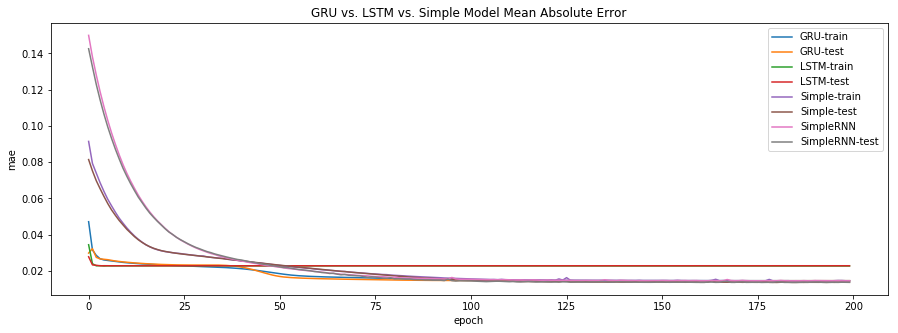

In [33]:
plt.figure(figsize=(15,5))
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])

plt.plot(history2.history['mean_absolute_error'])
plt.plot(history2.history['val_mean_absolute_error'])

plt.plot(history3.history['mean_absolute_error'])
plt.plot(history3.history['val_mean_absolute_error'])

plt.plot(history4.history['mean_absolute_error'])
plt.plot(history4.history['val_mean_absolute_error'])
plt.title('GRU vs. LSTM vs. Simple Model Mean Absolute Error')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['GRU-train','GRU-test','LSTM-train','LSTM-test','Simple-train','Simple-test', 'SimpleRNN', 'SimpleRNN-test'], loc='upper right')
plt.show()

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('GRU vs. LSTM vs. Simple Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['GRU-train','GRU-test','LSTM-train','LSTM-test','Simple-train','Simple-test','SimpleRNN','SimpleRNN-test'], loc='upper right')
plt.show()

In [ ]:
offset = 2500
samples = 300

plt.figure(figsize=(15,5))
plt.title('PM10 - Test Predictions (GRU vs. LSTM vs. SimpleGRU vs. Truth)')
plt.plot(testPredict[offset:offset+samples,0], 'r-', alpha=0.5)
plt.plot(testPredict2[offset:offset+samples,0], 'b-', alpha=0.5)
plt.plot(testPredict3[offset:offset+samples,0], '-', alpha=0.5)

plt.plot(testPredict4[offset:offset+samples,0], '-', alpha=0.5)
plt.plot(testY[offset:offset+samples,0], 'g-', alpha=0.5)
plt.legend(['Multi-GRU','Multi-LSTM','SingleGRU','SimpleRNN','truth'], loc='upper right')

plt.show()

#plt.figure(figsize=(15,5))
#plt.title('PM10 - Test Predictions (GRU vs. LSTM vs. Truth)')
#plt.plot(testPredict[offset:offset+samples,1], 'r-', alpha=0.5)
#plt.plot(testPredict2[offset:offset+samples,1], 'b-', alpha=0.5)
#plt.plot(testPredict3[offset:offset+samples,1], '-', alpha=0.5)
#plt.plot(testY[offset:offset+samples,1], 'g-', alpha=0.5)
#plt.legend(['GRU','LSTM','Simple','truth'], loc='upper right')

#plt.show()

In [ ]:
# invert predictions

# Supervisors... NB inverting the scaling is throwing a shape error that I can't fathom. Some help here?

trainPredict = x_scaler.inverse_transform(trainPredict)
trainY = x_scaler.inverse_transform(trainY)
testPredict = y_scaler.inverse_transform(testPredict)
testY = y_scaler.inverse_transform(testY)

In [ ]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[0:len(trainPredict), :] = trainPredict

In [ ]:
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict):len(testPredict)+len(trainPredict), :] = testPredict

In [ ]:
# plot baseline and predictions
plt.figure(figsize=(15,5))
#plt.plot(dataset['PM10 (ug/m^3)'], alpha=0.5)
plt.plot(trainPredictPlot, alpha=0.65)
plt.plot(testPredictPlot, alpha=0.65)
plt.show()

In [ ]:
import xarray as xr
import datashader as ds
import datashader.transfer_functions as tf
from collections import OrderedDict

from bokeh.models import BoxZoomTool, DatetimeTickFormatter
import bokeh.plotting as bp
bp.output_notebook()

df = testPredictPlot

formatter = DatetimeTickFormatter(microseconds=['%fus', '%H:%M %3fus', '%F %H:%M %3fus'],
        milliseconds=['%S.%3Ns', '%H:%M %3Nms', '%F %H:%M %3Nms'],
        seconds=['%Ss'],# '%H:%M:%S'],
        minsec=[':%M:%S', '%H:%M:%S'],
        hours=['%H:%M', '%F %H:%M'],
        days=['%F'])

def base_plot(tools='pan,wheel_zoom,resize,reset'):
    p = bp.figure(tools=tools, plot_width=600, plot_height=300,
        x_range=x_range, y_range=y_range, outline_line_color=None,
        min_border=0, min_border_left=0, min_border_right=0,
        min_border_top=0, min_border_bottom=0, responsive=True)   
    p.xgrid.grid_line_color = None
    p.ygrid.grid_line_color = None
    p.xaxis.formatter = formatter
    p.add_tools(BoxZoomTool(match_aspect=True))
    return p

def create_image(x_range, y_range, w, h, df=df):
    cvs = ds.Canvas(x_range=x_range, y_range=y_range,
                    plot_height=h, plot_width=w)
    aggs = [cvs.line(df, 'epoch', c, agg=ds.count()) for c in cols]
    merged = xr.concat(aggs, dim=pd.Index(cols, name='cols'))
    total = merged.sum(dim='cols')
    image = tf.shade(total, how='linear')
    return tf.dynspread(image)

p2 = base_plot()
InteractiveImage(p2, create_image, df=history)